# 지도학습 분류 미리보기

In [1]:
# pip install scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import matplotlib.font_manager as fm
import matplotlib

In [4]:
font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

예측된 점수: [94.]


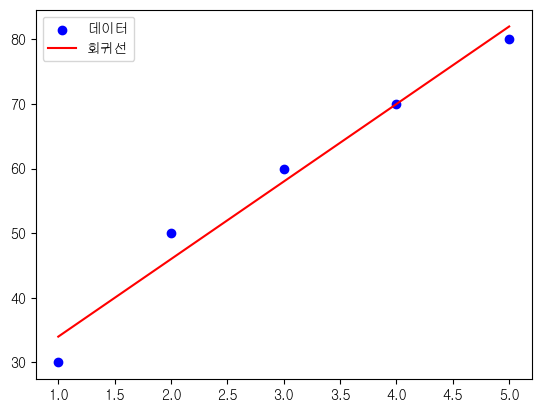

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 데이터 (공부시간 → 점수)
X = np.array([[1], [2], [3], [4], [5]])  # 입력 (독립 변수)
y = np.array([30, 50, 60, 70, 80])      # 출력 (종속 변수)

# 모델 학습
model = LinearRegression()
model.fit(X, y)

# 예측
X_test = np.array([[6]])
y_pred = model.predict(X_test)

print("예측된 점수:", y_pred)

# 시각화
plt.scatter(X, y, color="blue", label="데이터")
plt.plot(X, model.predict(X), color="red", label="회귀선")
plt.legend()
plt.show()


### 생선 이진분류 - 도미(bream) or 빙어(smelt)
- 이진분류 0, 1로 구분
- 도미야? (1), 도미가 아니야?(0)

In [160]:
# 도미
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [161]:
# 빙어
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [15]:
len(bream_length), len(bream_length)

(35, 35)

In [16]:
len(smelt_length), len(smelt_length)

(14, 14)

In [ ]:
# 도미와 빙어를 크기와 무게를 기준으로 분류해서 학습을 시킨다?
# bream이 length와 weight가 smelt 보다 데이터상으로는 크다.

In [ ]:
# bream 

In [ ]:
# 우리가 해야할 것, 각 데이터를 시각화해서 알아볼 수 있게 해야한다.
plt.scatter(bream_length, bream_weight, '도미')
plt.scatter(smelt_length, smelt_weight, '빙어')
각 축에 대한 이름
x = length, y = weight

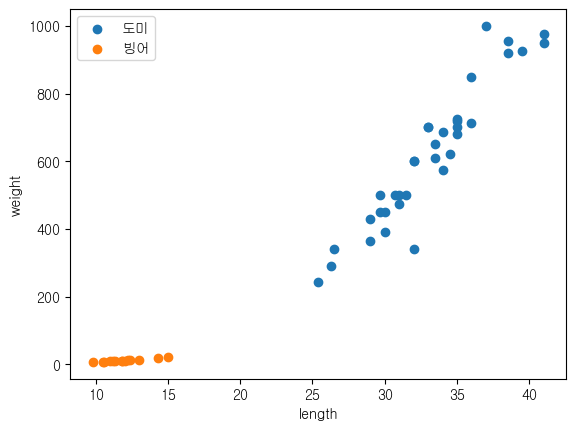

In [162]:
# bream 시각화
plt.scatter(bream_length, bream_weight, label='도미')
# smelt 시각화
plt.scatter(smelt_length, smelt_weight, label='빙어')
# 각 축에 대한 이름
plt.xlabel('length')
plt.ylabel('weight')
# 범례 표시
plt.legend()
# 그래프 표시
plt.show()

In [ ]:
# 분류를 하기 위해서는 데이터를 분류해야 한다.
# length와 weight를 기준으로 분류해서 학습을 시킨다. (두 데이터가 공통으로 가지고 있다)

In [ ]:
# knn 알고리즘을 사용해서 분류를 해보자.
# knn : 최근접 이웃 알고리즘

#### 데이터 전처리
- 모델이 원하는 형태로 데이터 가공
    - 입력(특성): [길이, 무게] 2차원 배열
    - 결과(정답): 도미 or 빙어 -> 1, 0으로 구성된 1차원 배열

In [ ]:
# 데이터 전처리에서 가장 중요한 것은 모델이 원하는 형태로 데이터 가공하는 것!

In [ ]:
# 우리는 bream과 smelt의 데이터를 가지고 있는데, 이 데이터를 모델이 이해할 수 있도록 가공해야 한다.
# 지도학습 : 특성 데이터와 정답이 있는 경우

In [17]:
fish_lenght = np.concatenate((bream_length, smelt_length))
fish_lenght

array([25.4, 26.3, 26.5, 29. , 29. , 29.7, 29.7, 30. , 30. , 30.7, 31. ,
       31. , 31.5, 32. , 32. , 32. , 33. , 33. , 33.5, 33.5, 34. , 34. ,
       34.5, 35. , 35. , 35. , 35. , 36. , 36. , 37. , 38.5, 38.5, 39.5,
       41. , 41. ,  9.8, 10.5, 10.6, 11. , 11.2, 11.3, 11.8, 11.8, 12. ,
       12.2, 12.4, 13. , 14.3, 15. ])

In [19]:
len(fish_lenght)

49

In [18]:
fish_weight = np.concatenate((bream_weight, smelt_weight))
fish_weight

array([ 242. ,  290. ,  340. ,  363. ,  430. ,  450. ,  500. ,  390. ,
        450. ,  500. ,  475. ,  500. ,  500. ,  340. ,  600. ,  600. ,
        700. ,  700. ,  610. ,  650. ,  575. ,  685. ,  620. ,  680. ,
        700. ,  725. ,  720. ,  714. ,  850. , 1000. ,  920. ,  955. ,
        925. ,  975. ,  950. ,    6.7,    7.5,    7. ,    9.7,    9.8,
          8.7,   10. ,    9.9,    9.8,   12.2,   13.4,   12.2,   19.7,
         19.9])

In [163]:
len(fish_weight)

49

In [165]:
fish_lenght = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight
# np.concatenate : 두 배열을 합치는 함수와 같은 역할을 한다.

In [166]:
fish_lenght, fish_weight

([25.4,
  26.3,
  26.5,
  29.0,
  29.0,
  29.7,
  29.7,
  30.0,
  30.0,
  30.7,
  31.0,
  31.0,
  31.5,
  32.0,
  32.0,
  32.0,
  33.0,
  33.0,
  33.5,
  33.5,
  34.0,
  34.0,
  34.5,
  35.0,
  35.0,
  35.0,
  35.0,
  36.0,
  36.0,
  37.0,
  38.5,
  38.5,
  39.5,
  41.0,
  41.0,
  9.8,
  10.5,
  10.6,
  11.0,
  11.2,
  11.3,
  11.8,
  11.8,
  12.0,
  12.2,
  12.4,
  13.0,
  14.3,
  15.0],
 [242.0,
  290.0,
  340.0,
  363.0,
  430.0,
  450.0,
  500.0,
  390.0,
  450.0,
  500.0,
  475.0,
  500.0,
  500.0,
  340.0,
  600.0,
  600.0,
  700.0,
  700.0,
  610.0,
  650.0,
  575.0,
  685.0,
  620.0,
  680.0,
  700.0,
  725.0,
  720.0,
  714.0,
  850.0,
  1000.0,
  920.0,
  955.0,
  925.0,
  975.0,
  950.0,
  6.7,
  7.5,
  7.0,
  9.7,
  9.8,
  8.7,
  10.0,
  9.9,
  9.8,
  12.2,
  13.4,
  12.2,
  19.7,
  19.9])

In [28]:
fish_leght1 = bream_length + smelt_length
fish_weight1 = bream_weight + smelt_weight

In [167]:
train_input = np.column_stack((fish_lenght, fish_weight))
train_input
train_target = np.concatenate((np.ones(len(bream_length)), np.zeros(len(smelt_length))))
train_target
# np.column_stack : 두 배열을 열로 합치는 함수와 같은 역할을 한다.
# np.ones : 1로 이루어진 배열을 만드는 함수와 같은 역할을 한다.
# np.zeros : 0으로 이루어진 배열을 만드는 함수와 같은 역할을 한다.


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [29]:
# 훈련 입력 데이터를 합쳐서 하나의 배열로 만들기
train_input1 = []
for l, w in zip(fish_lenght1, fish_weight1):
    train_input1.append([l, w])

train_input1

NameError: name 'fish_lenght1' is not defined

In [169]:
train_iinput = []

In [232]:
# 훈련 입력 데이터를 합쳐서 하나의 배열로 만들기
train_input = []
for l, w in zip(fish_lenght, fish_weight):
    train_input.append([l, w])
# train_input = np.array(train_input)
train_input

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [191]:
len(train_input)

49

In [172]:
# 훈련 정답 데이터
train_label = [1] * len(bream_length) + [0] * len(smelt_length)
train_label = np.array(train_label)

In [173]:
len(train_label)

49

In [31]:
# 훈련 정답 데이터
train_target = np.concatenate((np.ones(len(bream_length)), np.zeros(len(smelt_length))))
train_target


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [174]:
# 훈련 정답 데이터를 합쳐서 하나의 배열로 만들기
train_target= []
for l, w in zip(fish_lenght, fish_weight):
    train_target.append([l, w])
# train_target = np.array(train_target)
train_target= []

##### k-최근접 이웃 분류 모델델

In [142]:
from sklearn.neighbors import KNeighborsClassifier

In [175]:
kn = KNeighborsClassifier()

# fit(훈련/학습) - score(평가) - predict(예측)
kn.fit(train_input, train_label) # 입력 데이터, 정답 데이터터

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [159]:
kn.score(train_input, train_label) # 훈련 데이터로 평가, 0-1 사이의 값을 가진다.
                                   # 1 == 100%, 100점

0.7142857142857143

In [ ]:
kn.score([[35, 200]], [1]) # 평가 데이터

1.0

In [55]:
kn.predict([[35, 520], [100, 200]]) # 예측 데이터

array([1, 1])

##### 최근접 이웃 모델의 작동 원리
- 주어진 데이터가 가장 가까운 k개의 이웃을 찾고, 이웃 데이터를 이용해 예측
- 따라서 최근접 이웃 모델의 훈련은 별도의 연산 없이 모델이 데이터를 로드하면 끝남

In [ ]:
kn.kneighbors([[10, 5]])

(array([[1.71172428, 2.0880613 , 2.54950976, 3.92173431, 4.80520551]]),
 array([[35, 37, 36, 40, 38]]))

In [ ]:
# (array([[1.71172428, 2.0880613 , 2.54950976, 3.92173431, 4.80520551]]),
# # 가장 가까운 5개의 이웃을 찾아서 나와의 거리를 반환환
#  array([[35, 37, 36, 40, 38]])) # 가장 가까운 5개의 이웃을 찾아서 인덱스를 반환

In [59]:
distances, indexes = kn.kneighbors([[10, 5]])
print(distances, indexes)

[[1.71172428 2.0880613  2.54950976 3.92173431 4.80520551]] [[35 37 36 40 38]]


In [176]:
print(np.array(train_input[indexes]))
# 에러가 발생하는 이유:
# train_label은 리스트이기 때문에, 넘파이 배열의 인덱싱처럼 배열로 인덱싱할 수 없습니다.
# 따라서 train_label을 넘파이 배열로 변환한 후 인덱싱해야 합니다.
print(np.array(train_label[indexes]))

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
# -distances : 모델 데이터포인트와의 거리 (유클리드 거리 측정 방식)
# -indexes : 모델 데이터포인트의 인덱스

In [148]:
train_input = np.array(train_input)
# train_label = np.array(train_label)

TypeError: list indices must be integers or slices, not tuple

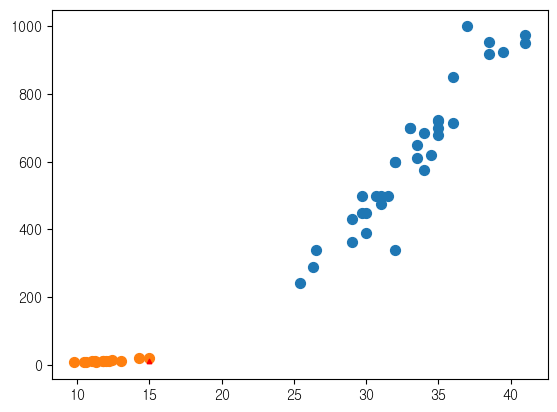

In [184]:
plt.scatter(bream_length, bream_weight, label='도미', s=50)
plt.scatter(smelt_length, smelt_weight, label='빙어', s=50)
plt.scatter(15, 10, label='예측', marker='^', c='r', s=10)
# 에러가 발생하는 이유는 train_label이 1차원 배열(혹은 리스트)이기 때문에, train_label[indexes, [1]]처럼 2차원 인덱싱을 할 수 없기 때문입니다.
# 또한, indexes는 2차원 배열이므로 1차원으로 평탄화(flatten)해서 인덱싱해야 합니다.
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='x', c='g', label='최근접이웃', s=50)
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [95]:
# k 개수 변경
kn49 = KNeighborsClassifier(n_neighbors=49)

In [ ]:
# 학습
kn49.fit(train_input, train_label)
# 평가
kn49.score(train_input, train_label)



0.7142857142857143

In [ ]:
35/49 # 도미 개수 / 전체 개수

0.7142857142857143

In [125]:
# n_neighbors 개수 변경
kn1 = KNeighborsClassifier(n_neighbors=28)
# 학습
kn1.fit(train_input, train_label)
# 평가
kn1.score(train_input, train_label)


0.9591836734693877

In [ ]:
# 가장 근접한 이웃 정보를 모은 다음에 그 중에서도 많이 나온 것으로 결론은 낸다.

In [126]:
# n_neighbors 개수를 크게 잡으면 데이터가 많은 쪽에 더 가까운 이웃을 찾아서 예측하게 된다.

In [146]:
fish_lenght

array([25.4, 26.3, 26.5, 29. , 29. , 29.7, 29.7, 30. , 30. , 30.7, 31. ,
       31. , 31.5, 32. , 32. , 32. , 33. , 33. , 33.5, 33.5, 34. , 34. ,
       34.5, 35. , 35. , 35. , 35. , 36. , 36. , 37. , 38.5, 38.5, 39.5,
       41. , 41. ,  9.8, 10.5, 10.6, 11. , 11.2, 11.3, 11.8, 11.8, 12. ,
       12.2, 12.4, 13. , 14.3, 15. ])

##### 훈련데이터 - 테스트(평가)데이터 분리

In [177]:
# 훈련 입력 데이터를 합쳐서 하나의 배열로 만들기
fish_input = []
for l, w in zip(fish_lenght, fish_weight):
    fish_input.append([l, w])

fish_label = [1] * len(bream_length) + [0] * len(smelt_length)
fish_input, fish_label

([[25.4, 242.0],
  [26.3, 290.0],
  [26.5, 340.0],
  [29.0, 363.0],
  [29.0, 430.0],
  [29.7, 450.0],
  [29.7, 500.0],
  [30.0, 390.0],
  [30.0, 450.0],
  [30.7, 500.0],
  [31.0, 475.0],
  [31.0, 500.0],
  [31.5, 500.0],
  [32.0, 340.0],
  [32.0, 600.0],
  [32.0, 600.0],
  [33.0, 700.0],
  [33.0, 700.0],
  [33.5, 610.0],
  [33.5, 650.0],
  [34.0, 575.0],
  [34.0, 685.0],
  [34.5, 620.0],
  [35.0, 680.0],
  [35.0, 700.0],
  [35.0, 725.0],
  [35.0, 720.0],
  [36.0, 714.0],
  [36.0, 850.0],
  [37.0, 1000.0],
  [38.5, 920.0],
  [38.5, 955.0],
  [39.5, 925.0],
  [41.0, 975.0],
  [41.0, 950.0],
  [9.8, 6.7],
  [10.5, 7.5],
  [10.6, 7.0],
  [11.0, 9.7],
  [11.2, 9.8],
  [11.3, 8.7],
  [11.8, 10.0],
  [11.8, 9.9],
  [12.0, 9.8],
  [12.2, 12.2],
  [12.4, 13.4],
  [13.0, 12.2],
  [14.3, 19.7],
  [15.0, 19.9]],
 [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0

In [ ]:
# 
train_input = fish_input[:30]
train_label = fish_label[:30]

test_input = fish_input[30:]
test_label = fish_label[30:]

kn = KNeighborsClassifier()
kn.fit(train_input, train_label)
kn.score(test_input, test_label)

0.2631578947368421

In [ ]:
# Sampling 편향: 데이터가 한쪽으로 치우친 현상상

### **train_test_split()**

In [192]:
from sklearn.model_selection import train_test_split
train_test_split(fish_input, fish_label, test_size=0.3, stratify=fish_label, random_state=42)
# train_size=0.7, test_size=0.3, stratify=fish_label, random_state=42
# 데이터를 분리할 때 데이터가 한쪽으로 치우친 현상을 방지하기 위해서 사용
# stratify : 원본 데이터의 비율을 유지하면서 데이터를 분리

[[[12.2, 12.2],
  [32.0, 600.0],
  [34.5, 620.0],
  [30.7, 500.0],
  [32.0, 600.0],
  [35.0, 720.0],
  [11.3, 8.7],
  [36.0, 714.0],
  [29.0, 430.0],
  [11.2, 9.8],
  [29.7, 500.0],
  [12.0, 9.8],
  [31.0, 475.0],
  [37.0, 1000.0],
  [29.0, 363.0],
  [33.0, 700.0],
  [14.3, 19.7],
  [31.5, 500.0],
  [39.5, 925.0],
  [9.8, 6.7],
  [36.0, 850.0],
  [10.5, 7.5],
  [33.5, 610.0],
  [10.6, 7.0],
  [35.0, 700.0],
  [35.0, 725.0],
  [13.0, 12.2],
  [30.0, 450.0],
  [33.0, 700.0],
  [15.0, 19.9],
  [32.0, 340.0],
  [33.5, 650.0],
  [30.0, 390.0],
  [41.0, 975.0]],
 [[11.0, 9.7],
  [11.8, 9.9],
  [38.5, 955.0],
  [35.0, 680.0],
  [34.0, 575.0],
  [12.4, 13.4],
  [26.3, 290.0],
  [41.0, 950.0],
  [25.4, 242.0],
  [34.0, 685.0],
  [31.0, 500.0],
  [38.5, 920.0],
  [29.7, 450.0],
  [11.8, 10.0],
  [26.5, 340.0]],
 [0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1],
 [0, 0, 1, 1, 1,

train_test_split 함수를 사용하려면 학습용과 테스트용 데이터를 분리
train_test_split 호출 -> 반환
순서 : **중요**
학습용 인풋, 테스트용 인풋, 학습용 라벨, 테스트용 라벨

In [193]:
len(train_input)

49

In [194]:
train_input, test_input, train_label, test_label = train_test_split(fish_input, fish_label, test_size=0.3, stratify=fish_label, random_state=42)

In [197]:
train_input, test_input, train_label, test_label

([[12.2, 12.2],
  [32.0, 600.0],
  [34.5, 620.0],
  [30.7, 500.0],
  [32.0, 600.0],
  [35.0, 720.0],
  [11.3, 8.7],
  [36.0, 714.0],
  [29.0, 430.0],
  [11.2, 9.8],
  [29.7, 500.0],
  [12.0, 9.8],
  [31.0, 475.0],
  [37.0, 1000.0],
  [29.0, 363.0],
  [33.0, 700.0],
  [14.3, 19.7],
  [31.5, 500.0],
  [39.5, 925.0],
  [9.8, 6.7],
  [36.0, 850.0],
  [10.5, 7.5],
  [33.5, 610.0],
  [10.6, 7.0],
  [35.0, 700.0],
  [35.0, 725.0],
  [13.0, 12.2],
  [30.0, 450.0],
  [33.0, 700.0],
  [15.0, 19.9],
  [32.0, 340.0],
  [33.5, 650.0],
  [30.0, 390.0],
  [41.0, 975.0]],
 [[11.0, 9.7],
  [11.8, 9.9],
  [38.5, 955.0],
  [35.0, 680.0],
  [34.0, 575.0],
  [12.4, 13.4],
  [26.3, 290.0],
  [41.0, 950.0],
  [25.4, 242.0],
  [34.0, 685.0],
  [31.0, 500.0],
  [38.5, 920.0],
  [29.7, 450.0],
  [11.8, 10.0],
  [26.5, 340.0]],
 [0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1],
 [0, 0, 1, 1, 1,

In [198]:
sum(train_label), sum(test_label)

(24, 11)

In [200]:
24/35

0.6857142857142857

In [201]:
11/35

0.3142857142857143

In [199]:
35*0.7

24.5

In [202]:
14*0.7

9.799999999999999

In [209]:
np.array(train_input)
train_input

array([[  12.2,   12.2],
       [  32. ,  600. ],
       [  34.5,  620. ],
       [  30.7,  500. ],
       [  32. ,  600. ],
       [  35. ,  720. ],
       [  11.3,    8.7],
       [  36. ,  714. ],
       [  29. ,  430. ],
       [  11.2,    9.8],
       [  29.7,  500. ],
       [  12. ,    9.8],
       [  31. ,  475. ],
       [  37. , 1000. ],
       [  29. ,  363. ],
       [  33. ,  700. ],
       [  14.3,   19.7],
       [  31.5,  500. ],
       [  39.5,  925. ],
       [   9.8,    6.7],
       [  36. ,  850. ],
       [  10.5,    7.5],
       [  33.5,  610. ],
       [  10.6,    7. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  13. ,   12.2],
       [  30. ,  450. ],
       [  33. ,  700. ],
       [  15. ,   19.9],
       [  32. ,  340. ],
       [  33.5,  650. ],
       [  30. ,  390. ],
       [  41. ,  975. ]])

In [210]:
train_input[:, 0]

array([12.2, 32. , 34.5, 30.7, 32. , 35. , 11.3, 36. , 29. , 11.2, 29.7,
       12. , 31. , 37. , 29. , 33. , 14.3, 31.5, 39.5,  9.8, 36. , 10.5,
       33.5, 10.6, 35. , 35. , 13. , 30. , 33. , 15. , 32. , 33.5, 30. ,
       41. ])

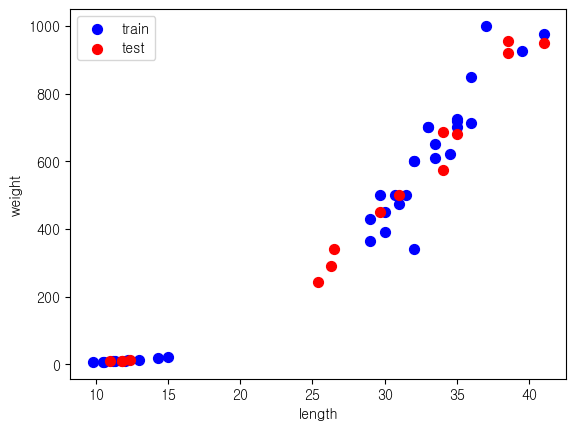

In [203]:
train_input = np.array(train_input)
test_input = np.array(test_input)

# 데이터 분포 산점도 확인
plt.scatter(train_input[:, 0], train_input[:, 1], label='train', c='blue', s=50)
plt.scatter(test_input[:, 0], test_input[:, 1], label='test', c='red', s=50)

plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()


In [211]:
kn.fit(train_input, train_label)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [212]:
kn.score(test_input, test_label)

1.0

### 정규화
- 데이터포인트의 값의 범위를 재정의 하는 것
    - StandardScaler
    - MinMaxScaler

In [214]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_label)
kn.score(test_input, test_label)

predict_input = [25, 150]
kn.predict([predict_input])

array([0])

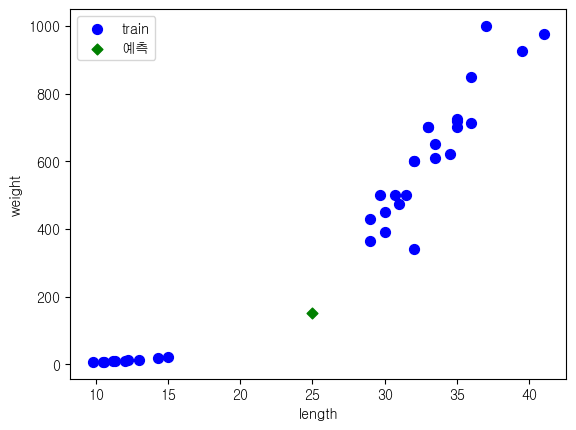

In [ ]:
train_input = np.array(train_input)
test_input = np.array(test_input)

# 데이터 분포 산점도 확인
plt.scatter(train_input[:, 0], train_input[:, 1], label='train', c='blue', s=50)
# plt.scatter(test_input[:, 0], test_input[:, 1], label='test', c='red', s=50)
plt.scatter(predict_input[0], predict_input[1], label='예측', c='green', s=30, marker='D')

plt.xlabel('length')
plt.ylabel('weight')

plt.legend()
plt.show()


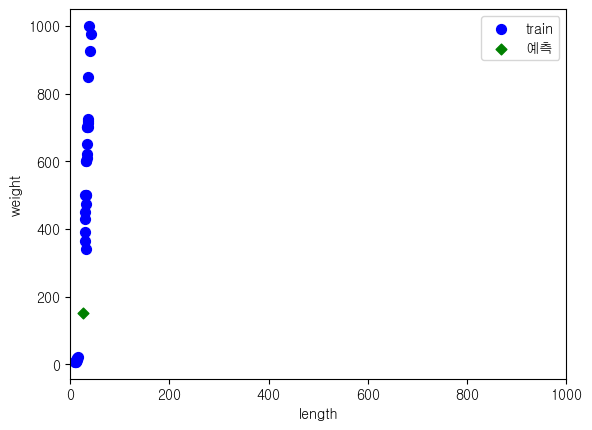

In [224]:
train_input = np.array(train_input)
test_input = np.array(test_input)

# 데이터 분포 산점도 확인
plt.scatter(train_input[:, 0], train_input[:, 1], label='train', c='blue', s=50)
# plt.scatter(test_input[:, 0], test_input[:, 1], label='test', c='red', s=50)
plt.scatter(predict_input[0], predict_input[1], label='예측', c='green', s=30, marker='D')

plt.xlabel('length')
plt.ylabel('weight')

# predict_input = [25, 150]
# kn.predict([predict_input])
# 결과 : array([0])
plt.xlim(0, 1000) # 실제로도도 산전도로는 빙어에 가깝다는 것을 알 수 있다.
plt.legend()
plt.show()


In [ ]:
# kneighbors 메서드는 예측하고자 하는 데이터와 가장 가까운 이웃 데이터를 찾아준다.
# 예측하고자 하는 데이터와 가장 가까운 이웃 데이터의 거리와 인덱스를 반환한다.
# 실제로 predict_input 데이터를 확인해보기 위해서 indexes 를 얻기 위해서 사용
# 그리고 실제 np.array(train_label)[indexes] 를 통해서 예측하고자 하는 데이터의 이웃 데이터의 라벨을 확인할 수 있다.

distances, indexes = kn.kneighbors([predict_input]) # [25, 150]
np.array(train_label)[indexes]

array([[0, 0, 0, 0, 0]])

##### 표준 점수 (Z-Score)
- 평균에서 얼마나 떨어져 있는지를 표준편차 단위로 계산한 값
$$
    표준 점수 = \frac{데이터포인트 - 평균}{표준편차}
$$

### **전처리**하는 과정이니 **중요**

In [225]:
# StandardScaler = Z-Score 와 동일
from sklearn.preprocessing import StandardScaler

# 표준화 전 데이터
print(train_input[:5])




[[ 12.2  12.2]
 [ 32.  600. ]
 [ 34.5 620. ]
 [ 30.7 500. ]
 [ 32.  600. ]]


In [228]:
mean = np.mean(train_input, axis=0) # 평균
std = np.std(train_input, axis=0) # 표준편차
mean, std

(array([ 27.02352941, 445.60294118]), array([ 10.0816099 , 319.21122132]))

In [233]:
train_input

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [230]:
train_scaled = (train_input - mean) / std
print(train_scaled)

[[-2.82632269 -1.40020351]
 [-2.63151531 -1.39443487]
 [-2.60691842 -1.39423859]
 [-2.64430569 -1.39541627]
 [-2.63151531 -1.39443487]
 [-2.60199904 -1.3932572 ]
 [-2.83517757 -1.40023786]
 [-2.59216028 -1.39331608]
 [-2.66103158 -1.39610324]
 [-2.83616145 -1.40022706]
 [-2.65414445 -1.39541627]
 [-2.82829044 -1.40022706]
 [-2.64135406 -1.39566161]
 [-2.58232152 -1.39050929]
 [-2.66103158 -1.39676078]
 [-2.62167655 -1.39345348]
 [-2.8056613  -1.4001299 ]
 [-2.63643469 -1.39541627]
 [-2.55772463 -1.39124534]
 [-2.84993571 -1.40025749]
 [-2.59216028 -1.39198138]
 [-2.84304858 -1.40024963]
 [-2.61675717 -1.39433673]
 [-2.8420647  -1.40025454]
 [-2.60199904 -1.39345348]
 [-2.60199904 -1.39320813]
 [-2.81845169 -1.40020351]
 [-2.65119282 -1.39590696]
 [-2.62167655 -1.39345348]
 [-2.79877417 -1.40012794]
 [-2.63151531 -1.3969865 ]
 [-2.61675717 -1.39394417]
 [-2.65119282 -1.3964958 ]
 [-2.5429665  -1.39075464]]


In [ ]:
# train_input -> train_scaled : 표준화 전처리, 정규화
# 마찬가지로 test_input -> test_scaled 로로 표준화 전처리, 정규화 해야 한다.

In [235]:
test_mean = np.mean(test_input, axis=0)
test_std = np.std(test_input, axis=0)
test_scaled = (test_input - test_mean) / test_std
test_scaled

array([[-1.57126493, -1.28263285],
       [-1.49331876, -1.28203945],
       [ 1.10813476,  1.52206951],
       [ 0.76712025,  0.70614531],
       [ 0.66968753,  0.39461061],
       [-1.43485913, -1.27165496],
       [-0.08054438, -0.45098356],
       [ 1.35171655,  1.50723453],
       [-0.16823382, -0.59339942],
       [ 0.66968753,  0.7209803 ],
       [ 0.37738939,  0.17208583],
       [ 1.10813476,  1.41822461],
       [ 0.25072686,  0.02373598],
       [-1.49331876, -1.28174275],
       [-0.06105784, -0.3026337 ]])

In [ ]:
# 표준화 전 데이터와 표준화 후 데이터의 비교
train_input -> train_scaled : 표준화 전처리, 정규화
train_label -> train_label : 변화 없음
test_input -> test_scaled : 표준화 전처리, 정규화
test_label -> test_label : 변화 없음

-> 표준화 전처리, 정규화 후 데이터로 학습을 시키고 평가를 해야 한다.
-> 정답, 결과는 그대로 사용용